# Reproducible Data Analysis with Jupyter

Jake Vanderplas

When done, linearize by using "restart and run all" 
- this helps check your work

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'fremont.csv')

('fremont.csv', <http.client.HTTPMessage at 0x1d495e95208>)

#unix command

In [3]:
!head fremont.csv  

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [4]:
import pandas as pd
df = pd.read_csv('fremont.csv')

In [5]:
df.shape

(54000, 3)

In [6]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 3 columns):
Date                            54000 non-null object
Fremont Bridge East Sidewalk    53991 non-null float64
Fremont Bridge West Sidewalk    53991 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,53991.000000,53991.000000
mean,57.162879,54.416569
std,82.455352,71.429187
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,70.000000,72.000000
max,717.000000,698.000000


In [9]:
df.set_index('Date')

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
10/03/2012 12:00:00 AM,9.0,4.0
10/03/2012 01:00:00 AM,6.0,4.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 03:00:00 AM,3.0,2.0
10/03/2012 04:00:00 AM,1.0,6.0
10/03/2012 05:00:00 AM,10.0,21.0
10/03/2012 06:00:00 AM,50.0,105.0
10/03/2012 07:00:00 AM,95.0,257.0
10/03/2012 08:00:00 AM,146.0,291.0


In [10]:
#Hey wait, set index and parse dates while reading...
df = pd.read_csv("fremont.csv", index_col='Date', parse_dates=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54000 entries, 2012-10-03 00:00:00 to 2018-11-30 23:00:00
Data columns (total 2 columns):
Fremont Bridge East Sidewalk    53991 non-null float64
Fremont Bridge West Sidewalk    53991 non-null float64
dtypes: float64(2)
memory usage: 1.2 MB


In [12]:
df.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


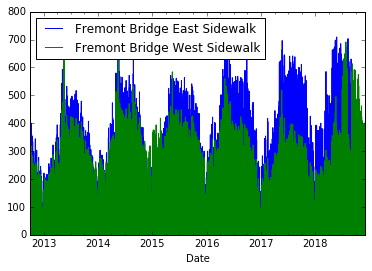

In [13]:
%matplotlib inline
df.plot()

A little dense.  These are hourly counts over 4 years.

Resample, weekly...

`resample`: Convenience method for __frequency conversion and resampling of time series__. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

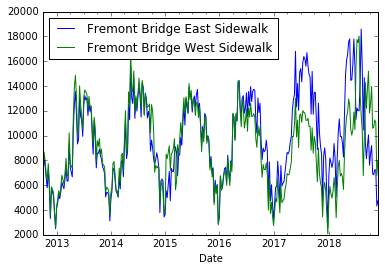

In [14]:
 df.resample('W').sum().plot()

In [15]:
#get some style
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [16]:
plt.style.available

['grayscale',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'seaborn-bright',
 'seaborn-talk',
 'dark_background',
 'bmh',
 'seaborn-muted',
 'seaborn-dark',
 'seaborn-poster',
 'ggplot',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-notebook',
 'seaborn-colorblind']

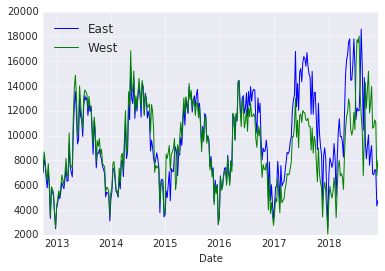

In [17]:
df.columns=['East', 'West'] #column names were verbose 
df.resample('W').sum().plot()

look for anual growth or trend. using daily sampling and rolling windows.

each of the points is a rolling sum of the previous 365 days.

In [18]:
df.head()

,East,West
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


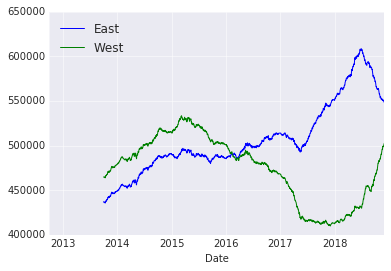

In [19]:
df.resample('D').sum().rolling(365).sum().plot()

Axes are a little suspect because they don't go to zero.

Note how this is accomplished by setting 'ax'.    

(0, 650000.0)

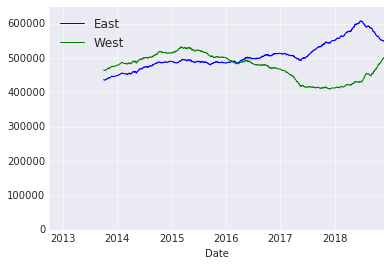

In [20]:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

Now the change does not appear as dramatic.

Add a 'total' column

(0, 1100000.0)

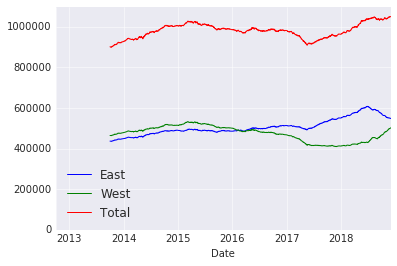

In [21]:
df['Total'] = df['West'] + df['East']

ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

Total is pretty consistent.  About a million per year.

Look at a trend within a group.  Look at the time of day...

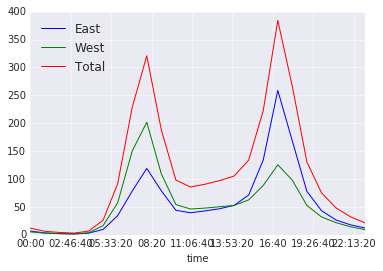

In [22]:
df.groupby(df.index.time).mean().plot()

Eastbound peaks opposite of West.

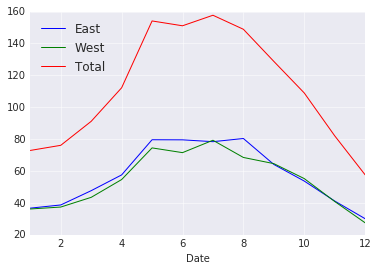

In [23]:
df.groupby(df.index.month).mean().plot()

Now, to see the 'whole' data

In [24]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5] #look at the first 5x5 block

#each column is a day, each row is an hour

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


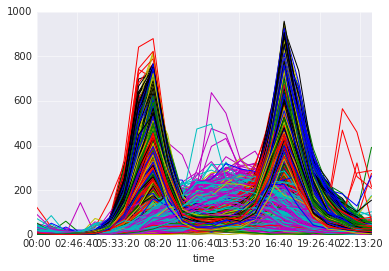

In [25]:
pivoted.plot(legend=False)
#this gives you a line for each day in all of the years

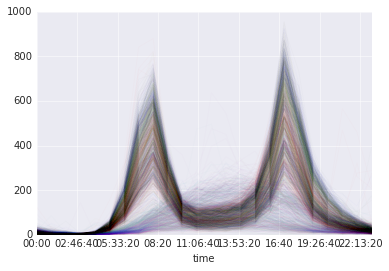

In [26]:
#pull back the opacity to see density better...
pivoted.plot(legend=False, alpha=0.01)


Hypothesis: peaks are weekdays.  Broad usage (lower) arc is probably weekend.